# Нейронные сети с TensorFlow


Установка (https://www.tensorflow.org/)
* pip3 install tensorflow
* pip3 install tensorflow-gpu

# Линейная модель

Попробуем начать с чего-нибудь очень простого. А что есть проще линейной регрессии? =)

Давайте для начала реализуем модель $x * w + b = \hat{y}$, которая будет будет предсказывать значение целевой переменной $y$, заодно разберёмся со структурой TensorFlow.

In [1]:
import tensorflow as tf

В модели выше используются аж 4 переменные. Но они не равнозначные, $x, \hat{y}$ - это входные данные из датасета, а $w, b$ - это параметры модели, которые мы будем настраивать.

In [2]:
# чтобы завести параметры модели, которые мы далее будем настраивать, используется класс tf.Variable
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)

# Для данных извне, которые мы будем передавать извне используется класс tf.placeholder
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Определим линейную модель
y_pred = W * x + b

Настраивая параметры, мы уменьшаем какую-то функцию потерь. В нашем случае это MSE.

In [3]:
loss = tf.square(y_pred - y) # sum of the squares

Не забываем указать, какой именно метод оптимизации мы хотим использовать для настройки параметров и что именно им мы хотим оптимизировать.

In [4]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

Подготовим данные для обучения.

In [5]:
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]

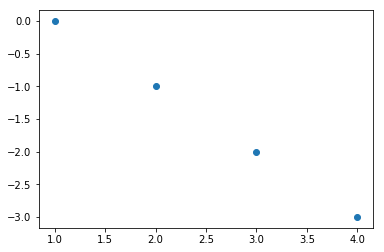

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x_train,y_train)

Уже всё готово - переменные созданые, граф вычислений создан, loss указан, метод оптимизации указан. Осталось запустить оптимизацию.

In [7]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(1000):
    sess.run(train, {x: x_train, y: y_train})

Выведем выученные параметры и loss

In [8]:
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

W: [-0.9999969] b: [ 0.99999082] loss: [  3.69624331e-11   8.88178420e-12   1.42108547e-14   1.11413101e-11]


![Graph](https://www.tensorflow.org/images/getting_started_final.png)

### Логистическая регрессия

Добавим в модель нелинейность =)

Теперь решаем задачу классификации на два класса. Для этого реализуем и обучим лог. регрессию.

Напомню смысл лог. регрессии. Предполагаем, что вероятности принадлежности объекта к первому классу определяются по формуле ниже.

$p(y=1|x) = \sigma(Wx + b)$, где $\sigma(x) = \frac{1}{1 + e^{-x}}$

Обучение заключается в минимизации logloss функции потерь:

$L = \sum_{i=1}^{n} \{ y_i  \log(p(y=1|x)) + (y_i - 1)  \log(1 - p(y=1|x)) \}$

In [12]:
from math import exp

In [13]:
import numpy as np

x_train = np.random.uniform(-1, 1, (100, 2))
y_train = (x_train[:, 1] < 0).astype(np.int)

In [17]:
x_train.shape

(100, 2)

In [29]:
W = tf.Variable(tf.random_normal([1,2]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

x = tf.placeholder(tf.float32,shape=[None,2])
y = tf.placeholder(tf.float32,shape=[None])

logit = tf.reduce_sum(x*W,axis = 1) + b
y_pred = tf.sigmoid(logit)
loss = tf.losses.log_loss(y,y_pred)

In [33]:
optimizer = tf.train.GradientDescentOptimizer(0.3)
train = optimizer.minimize(loss)

In [34]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(1000):
    sess.run(train, {x: x_train, y: y_train})

In [35]:
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

W: [[ 0.31562614 -8.42098045]] b: [-0.09407653] loss: 0.0835142


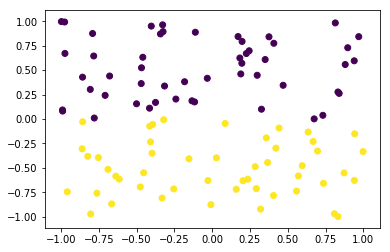

In [251]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

In [ ]:
# реализуйте и обучите линейную регрессию. при реализации будут полезными функции tf.sigmoid и tf.losses.log_loss

In [ ]:
# визуализируйте разделение на классы

### Сделаем что-то более крутое. Классифицируем MNIST

Загрузим наши данные

In [37]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


![Картинка](https://www.tensorflow.org/images/MNIST-Matrix.png)

In [38]:
import matplotlib

def plot_images_separately(images):
    "Plot the six MNIST images separately."
    fig = plt.figure()
    for j in range(1, 7):
        ax = fig.add_subplot(1, 6, j)
        ax.matshow(np.reshape(images[j-1], (28, 28)), cmap = matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.show()

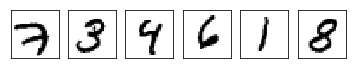

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]


In [39]:
plot_images_separately(mnist.train.images)
print(mnist.train.labels[0:6])

Единицы соответствуют индексу класса

### Однослойная нейронная сеть

Теперь делаем ещё маленький апгрейд предыдущей модели. Теперь у нас не два класса, а целых десять. Обобещение лог. регрессии на случай многих классов выглядит так:

$$p(y=i|x) = \mbox{softmax}_i(Wx + b)$$

Softmax - это функция, переводящая любой вектор в вектор из положительных элементов, суммирующихся в единицу по следующему правилу:

$$\mbox{softmax}_{i}(\textbf{z}) = \frac{e^{z_i}}{\sum_{i=1}^{k} e^{z_i}}$$

Выход softmax'а можно рассматривать как вероятности принадлежности объекта к классам.

Функционал, который мы будем оптимизировать, называется кроссэнтропией и выглядит так:

$$L = \sum_{i=1}^{n} \log{p(y_i| x_i)} $$

In [ ]:
# теперь реализуйте однослойнуй нейронную сеть. полезными будут функции  tf.nn.softmax и tf.nn.losses.softmax_cross_entropy

In [41]:
x_train = mnist.train.images
y_train = mnist.train.labels

In [42]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([1,10]))

logits = tf.matmul(x,W)+b
y_pred = tf.nn.softmax(logit)
loss = tf.losses.softmax_cross_entropy(y,logits)
optimizer = tf.train.GradientDescentOptimizer(0.3)
train = optimizer.minimize(loss)

In [44]:
x_val = mnist.validation.images
y_val = mnist.validation.labels

In [43]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(1000):
    train_batch_idx = np.random.randint(0,55000,1000)
    x_train_batch = x_train[train_batch_idx]
    y_train_batch = y_train[train_batch_idx]
    sess.run(train, {x: x_train, y: y_train})
    
    val_batch_idx = np.random.randint(0,55000,100)
    x_val_batch = x_val[val_batch_idx]
    y_val_batch = y_val[val_batch_idx]
    
    y_val_pred = sess.run(y_pred,{x:x_val_batch})

    acc = 
    print("Iter",i," accuracy on validation",acc)

KeyboardInterrupt: 

Теперь визуализируем веса для каждого нейрона.

In [1]:
#визуализируйте веса каждого нейрона

## Добавим скрытых слоёв

Прежде мы реализовали очень простую нейронную сеть, но даже она набирала 90% точности на датасете с картинками цифр.  Теперь давайте добавим в эту нейронную сеть скрытый слой.

$$h_1 = \sigma(W_1 x_1 + b_1)$$
$$ P(y=i|x) = \mbox{softmax}_i(W_2 h_1 + b_2) $$

In [319]:
Image(url="https://www.neuralnetworksanddeeplearning.ru/images/tikz35.png")

In [320]:
# измените код из предыдущего пункта так, чтобы нейронная сеть теперь содержала скрытый слой